## Introducción

En estos ejercicios vamos a trabajar con los datasets alojado en la ruta del curso **/Dia-05/datasets/marvel-wikia-data.csv** representa el conjunto de personajes de Marvel en sus cómics con características de cada uno de ellos.

Las columnas del dataframe significan lo siguiente:

1. `page_id`: Identificador único de la página del personaje dentro de la wikia.  
2. `name`: Nombre del personaje.  
3. `urlslug`: URL única dentro de la wikia que lleva a la página del personaje.  
4. `ID`: Estado de identidad del personaje (Identidad secreta, pública, o sin identidad dual en Marvel).  
5. `ALIGN`: Alineación del personaje (Bueno, Malo o Neutral).  
6. `EYE`: Color de ojos del personaje.  
7. `HAIR`: Color de cabello del personaje.  
8. `SEX`: Sexo del personaje (e.g. Masculino, Femenino, etc.).  
9. `GSM`: Indica si el personaje pertenece a una minoría de género o sexual (e.g. Homosexual, Bisexual).  
10. `ALIVE`: Indica si el personaje está vivo o fallecido.  
11. `APPEARANCES`: Número de apariciones del personaje en cómics (al 2 de septiembre de 2014; el número puede estar desactualizado).  
12. `FIRST APPEARANCE`: Mes y año de la primera aparición del personaje en un cómic, si está disponible.  
13. `YEAR`: Año de la primera aparición del personaje en un cómic, si está disponible.  


Ejecuta la siguiente celda para el dataframe con el contenido del dataset.

### EJERCICIO 1. Gráfico de tendencia: Evolución de la cantidad de personajes creados por año

* Analiza la cantidad de personajes creados cada año (YEAR).
* Crea un gráfico de línea que muestre la evolución del número de personajes creados a lo largo del tiempo.

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_marvel = pd.read_csv("../datasets/marvel-wikia-data.csv", index_col=0)


df_marvel.head(10)

,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
page_id,,,,,,,,,,,,
1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
2458,Benjamin Grimm (Earth-616),\/Benjamin_Grimm_(Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,NaN,Living Characters,2255.0,Nov-61,1961.0
2166,Reed Richards (Earth-616),\/Reed_Richards_(Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2072.0,Nov-61,1961.0
1833,Hulk (Robert Bruce Banner),\/Hulk_(Robert_Bruce_Banner),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2017.0,May-62,1962.0
29481,Scott Summers (Earth-616),\/Scott_Summers_(Earth-616),Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1955.0,Sep-63,1963.0


<Axes: title={'center': 'Evolución de la cantidad de personajes creados por año'}, xlabel='Año', ylabel='Número de personajes'>

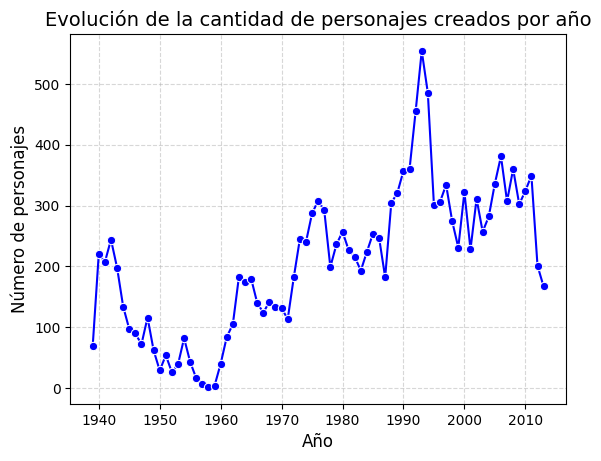

In [37]:
# Contar personajes creados por año
characters_by_year = df_marvel.groupby('Year').size().reset_index(name='count')

# Gráfico de línea
plt.title('Evolución de la cantidad de personajes creados por año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de personajes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
sns.lineplot(data=characters_by_year, x='Year', y='count', marker='o', color='blue')



### EJERCICIO 2. Mapa de calor: Relación entre alineación y estado vivo/fallecido

* Analiza la relación entre la alineación del personaje (ALIGN) y su estado (ALIVE).
* Muestra un mapa de calor que cuente cuántos personajes de cada tipo (Bueno, Malo, Neutral) están vivos o fallecidos.
* Saca una conclusión del gráfico.

<Axes: title={'center': 'Relación entre alineación y estado (vivo/fallecido)'}, xlabel='ALIVE', ylabel='ALIGN'>

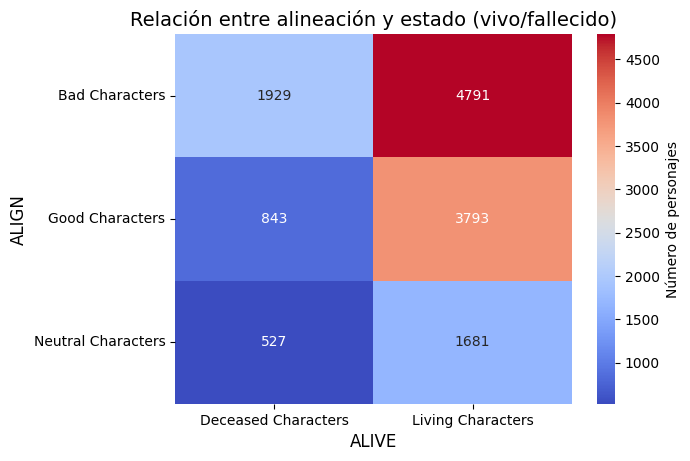

In [38]:
# Crear una tabla de contingencia para ALIGN y ALIVE
heatmap_data = df_marvel.pivot_table(index='ALIGN', columns='ALIVE', aggfunc='size', fill_value=0)

# Gráfico de mapa de calor

plt.title('Relación entre alineación y estado (vivo/fallecido)', fontsize=14)
plt.xlabel('Estado (ALIVE)', fontsize=12)
plt.ylabel('Alineación (ALIGN)', fontsize=12)

sns.heatmap(heatmap_data, annot=True, fmt="d", cmap='coolwarm', cbar_kws={'label': 'Número de personajes'})


#### CONCLUSIONES:

El gráfico destaca una mayoría de personajes vivos, especialmente entre los buenos y malos. Los personajes malos son los más numerosos en general, pero también tienen una proporción más alta de fallecidos. Esto refleja patrones narrativos en los cómics, donde los villanos suelen tener destinos trágicos, mientras que los héroes sobreviven para continuar siendo parte de la historia.

### EJERCICIO 3. Gráfico de dispersión: Relación entre número de apariciones y año de creación

* Analiza cómo se ha distribuido el sexo (SEX) de los personajes a lo largo del tiempo (YEAR).
* Crea dos gráficos de dispersión uno para el rango de años entre 1940-1960 y otro para el rango 2000-2020 en el que los puntos representen el año de creación y el sexo del personaje, diferenciados por color.
* Crea conclusiones sobre los dos gráficos.

In [39]:
# Agrupar por año (YEAR) y género (SEX) para contar la cantidad de personajes en cada categoría
grouped_data = df_marvel.groupby(['Year', 'SEX']).size().reset_index(name='count')

# Mostrar las primeras filas del resultado para verificar
grouped_data.tail(20)


,Year,SEX,count
155,2006.0,Male Characters,259
156,2007.0,Agender Characters,1
157,2007.0,Female Characters,82
158,2007.0,Male Characters,209
159,2008.0,Agender Characters,1
160,2008.0,Female Characters,101
161,2008.0,Male Characters,244
162,2009.0,Agender Characters,1
163,2009.0,Female Characters,85
164,2009.0,Male Characters,199


C:\Users\Arturo\AppData\Local\Temp\ipykernel_15236\1992668381.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=scatter_data, x='Year', y='SEX', jitter=True, palette='Set2', alpha=0.7)


<Axes: title={'center': 'Relación entre año de creación y género de los personajes'}, xlabel='Año de creación', ylabel='Sexo del personaje'>

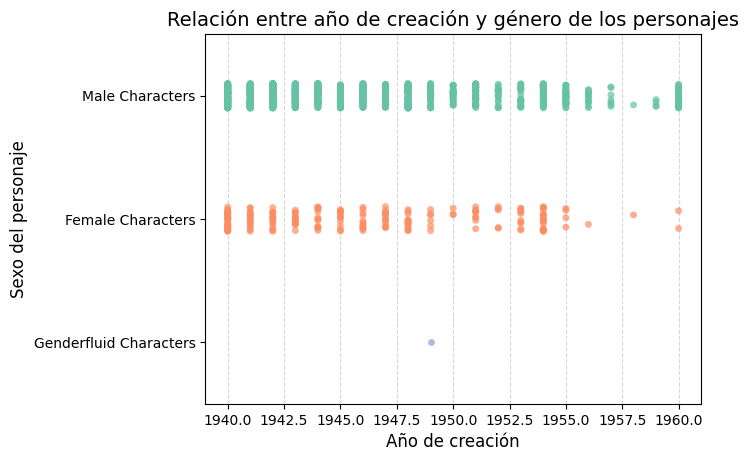

In [40]:
# Filtrar datos relevantes para asegurarse de no incluir valores faltantes
scatter_data = df_marvel.loc[(df_marvel.Year >= 1940) & (df_marvel.Year <= 1960)][['Year', 'SEX']].dropna()

# Gráfico de dispersión
plt.title('Relación entre año de creación y género de los personajes', fontsize=14)
plt.xlabel('Año de creación', fontsize=12)
plt.ylabel('Sexo del personaje', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

sns.stripplot(data=scatter_data, x='Year', y='SEX', jitter=True, palette='Set2', alpha=0.7)


C:\Users\Arturo\AppData\Local\Temp\ipykernel_15236\2844295733.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=scatter_data, x='Year', y='SEX', jitter=True, palette='Set2', alpha=0.7)


<Axes: title={'center': 'Relación entre año de creación y género de los personajes'}, xlabel='Año de creación', ylabel='Sexo del personaje'>

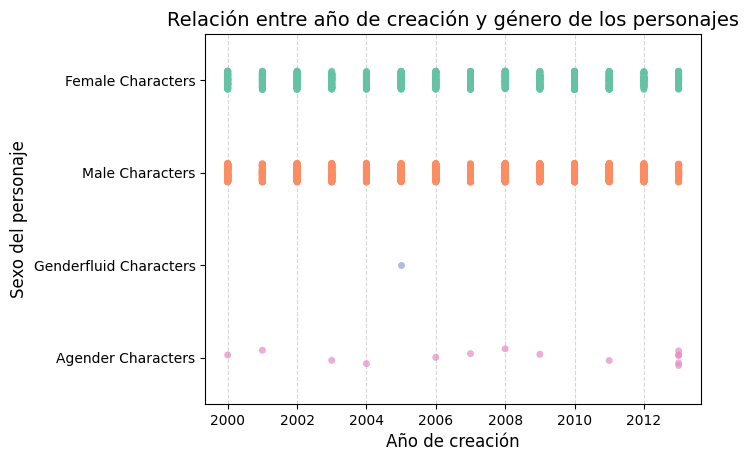

In [41]:
# Filtrar datos relevantes para asegurarse de no incluir valores faltantes
scatter_data = df_marvel.loc[(df_marvel.Year >= 2000) & (df_marvel.Year <= 2020)][['Year', 'SEX']].dropna()

# Gráfico de dispersión
plt.title('Relación entre año de creación y género de los personajes', fontsize=14)
plt.xlabel('Año de creación', fontsize=12)
plt.ylabel('Sexo del personaje', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

sns.stripplot(data=scatter_data, x='Year', y='SEX', jitter=True, palette='Set2', alpha=0.7)

#### CONCLUSIONES:

**Diversidad de géneros:**

1940-1960:
Durante este período, los personajes se dividen principalmente en dos categorías: Male Characters y Female Characters.
La presencia de otros géneros como Genderfluid Characters es prácticamente inexistente o muy marginal.

2000-2013:
En este período, se observa la introducción de géneros adicionales como Genderfluid Characters y Agender Characters. Aunque su número es reducido, esto indica un cambio hacia una mayor diversidad y representación en los cómics.

**Predominio de personajes masculinos y femeninos:**

1940-1960:
Los personajes masculinos (Male Characters) dominan claramente, con una cantidad significativamente mayor que los femeninos (Female Characters). Esto refleja una tendencia clásica de la época, donde los protagonistas masculinos eran más comunes.

2000-2013:
La proporción entre personajes masculinos y femeninos parece más equilibrada, indicando un esfuerzo por incluir más personajes femeninos en los cómics modernos.

### EJERCICIO 4. Histograma: Distribución del número de apariciones de los personajes

* Analiza cómo se distribuyen las apariciones de los personajes (APPEARANCES).
* Crea un histograma que muestre la frecuencia de personajes según su número de apariciones.

<Axes: title={'center': 'Distribución de Personajes por Década'}, xlabel='Década', ylabel='Cantidad de Personajes'>

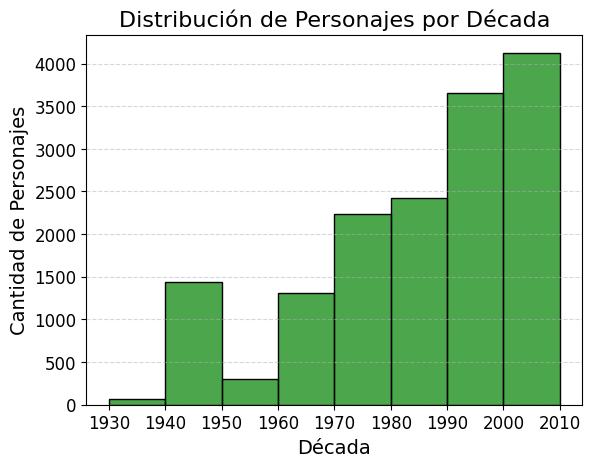

In [42]:
# Crear una nueva columna para agrupar los años por décadas
df_marvel['Decade'] = (df_marvel['Year'] // 10) * 10

# Personalización del gráfico
plt.title('Distribución de Personajes por Década', fontsize=16)
plt.xlabel('Década', fontsize=14)
plt.ylabel('Cantidad de Personajes', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Crear el histograma para mostrar la distribución por décadas

sns.histplot(data=df_marvel, x='Decade', bins=8, color='green', edgecolor='black', alpha=0.7)
